<a href="https://colab.research.google.com/github/Souza172890/Teste_Tecnico/blob/main/Q4_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instalando as bibliotecas necessárias
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (92.1 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state

In [ ]:
#instalando as bibliotecas necessárias
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely
!pip install pyproj

Selecting previously unselected package python-pkg-resources.
(Reading database ... 155238 files and directories currently installed.)
Preparing to unpack .../00-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../01-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../02-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../03-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../04-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-numpy.
Preparing to unpack .../05-python

In [ ]:
#instalando as bibliotecas necessárias
!pip install salem

     |████████████████████████████████| 85 kB 2.7 MB/s 


In [ ]:
#instalando as bibliotecas necessárias
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.7 MB/s 
     |████████████████████████████████| 15.4 MB 34.7 MB/s 


In [ ]:
#importando as bibliotecas necessárias
import salem
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs                         
import cartopy.io.shapereader as shpreader                           
import xarray as xr
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

In [ ]:
#importando as bibliotecas necessárias
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

In [ ]:
#importando as bibliotecas necessárias
import geopandas

In [ ]:
#convertendo as longitudes para variarem de -180 a 180° ao invés de 0 a 360°:
ds = xr.open_dataset('test.nc')
ds.coords['lon'] = ((ds.coords['lon'] + 180) % 360) - 180
ds = ds.sortby(ds.lon)
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 1, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 2021-09-01T12:00:00
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    sst      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    ice      (time, zlev, lat, lon) float32 ...
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20210901.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_start:        2021-09-01T00:00:00Z
    time_coverage_end:          2021-09-01T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

In [ ]:
#criando um dataframe dos dados
df = ds.to_dataframe()
df

sst  anom  err   ice
lat     lon      time                zlev                       
-89.875 -179.875 2021-09-01 12:00:00 0.0    NaN   NaN  NaN   NaN
        -179.625 2021-09-01 12:00:00 0.0    NaN   NaN  NaN   NaN
        -179.375 2021-09-01 12:00:00 0.0    NaN   NaN  NaN   NaN
        -179.125 2021-09-01 12:00:00 0.0    NaN   NaN  NaN   NaN
        -178.875 2021-09-01 12:00:00 0.0    NaN   NaN  NaN   NaN
...                                         ...   ...  ...   ...
 89.875  178.875 2021-09-01 12:00:00 0.0  -1.49  0.31  0.3  0.92
         179.125 2021-09-01 12:00:00 0.0  -1.80  0.00  0.3  0.92
         179.375 2021-09-01 12:00:00 0.0  -1.80  0.00  0.3  0.92
         179.625 2021-09-01 12:00:00 0.0  -1.80  0.00  0.3  0.92
         179.875 2021-09-01 12:00:00 0.0  -1.80  0.00  0.3  0.92

[1036800 rows x 4 columns]

In [ ]:
#salvando o dataframe em formato csv
df.to_csv('/content/test_df.csv')

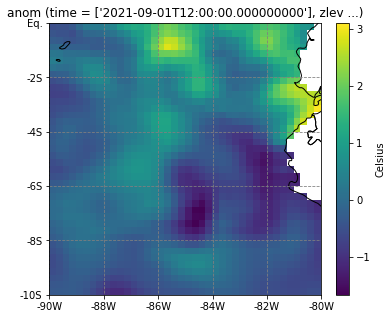

In [ ]:
#representação gráfica da temperatura na região do Niño 1 + 2
dsr = ds.sel(lat=slice(-10, 0), lon=slice(-90, -80))
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
dsr.anom.salem.quick_map();

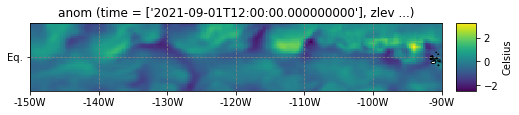

In [ ]:
#representação gráfica da temperatura na região do Niño 3.4
dsr = ds.sel(lat=slice(-5, 5), lon=slice(-150, -90))
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
dsr.anom.salem.quick_map();

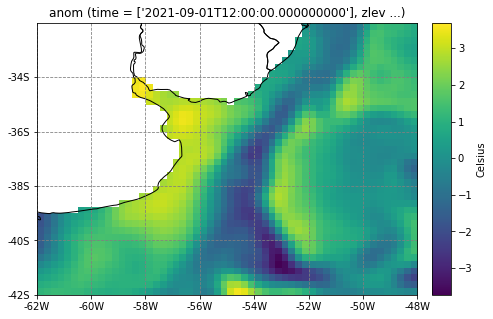

In [ ]:
#representação gráfica da temperatura para a confluência Brasil-Malvinas
dsr = ds.sel(lat=slice(-42, -32), lon=slice(-62, -48))
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
dsr.anom.salem.quick_map();